**Ensemble learning: using a random forest**


We'll use a random forest of 10 decision trees to predict employment of specific candidate profiles:

['Years Experience', 'Employed?', 'Previous employers', 'Level of Education', 'Top-tier school', 'Interned']


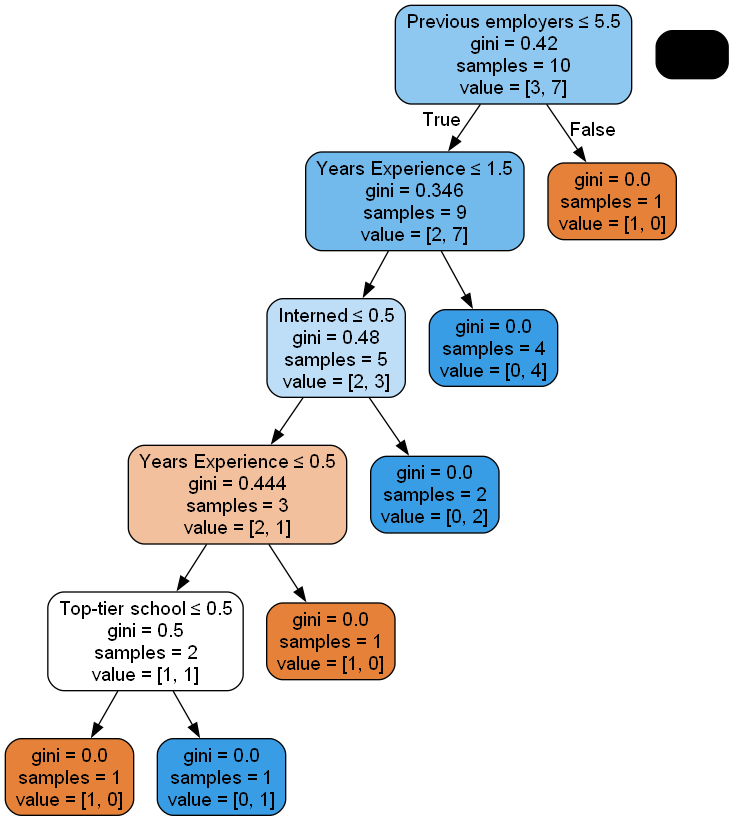

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from IPython.display import Image  
from six import StringIO  
import pydotplus
from sklearn.model_selection import train_test_split

input_file = "PastHires.csv"
df = pd.read_csv(input_file, header = 0)

d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df

features = list(df.columns[:6])
print(features)

X = df[features]
y = df["Hired"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X,y)
clf = clf.fit(X_train, y_train)

# tree.plot_tree(clf)

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [4]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

#Predict employment of an employed 10-year veteran
print (clf.predict([[10, 1, 4, 0, 0, 0]]))
#...and an unemployed 10-year veteran
print (clf.predict([[10, 0, 4, 0, 0, 0]]))

[1]
[0]


c:\Users\ahmad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\ahmad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
